# Schools Data

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("C:/Users/dmretiv/Desktop/projects/dsacademy-python/schools-data/Schools Data.xlsx")

In [3]:
df.head(1)

,Unnamed: 0,ID,region,school_type,total_students_2018,total_after_9_2018,total_after_11_2018,diff_teens_2018,deficit_places_2018,3_times_school_2018,...,total_students_9,total_students_10,total_students_11,nationality_diversity_index,load_ratio,drinking_water_presence,qedu_top_uni,qedu_passed_ent,qedu_continued_education,qedu_elite_achievements
0,0,1,Акмолинская область,"общеобразовательная школа, опорная школа (ресу...",833,70,42.0,8.0,0.0,0,...,0.081464,0.01889,0.049587,0.904265,1.366129,да,0.047619,1.0,1.0,0.056856


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head(1)

,ID,region,school_type,total_students_2018,total_after_9_2018,total_after_11_2018,diff_teens_2018,deficit_places_2018,3_times_school_2018,barrier_free_2018,...,total_students_9,total_students_10,total_students_11,nationality_diversity_index,load_ratio,drinking_water_presence,qedu_top_uni,qedu_passed_ent,qedu_continued_education,qedu_elite_achievements
0,1,Акмолинская область,"общеобразовательная школа, опорная школа (ресу...",833,70,42.0,8.0,0.0,0,1,...,0.081464,0.01889,0.049587,0.904265,1.366129,да,0.047619,1.0,1.0,0.056856


# GDP Analysis

In [74]:
df_gdp =  pd.read_excel("C:/Users/dmretiv/Desktop/projects/dsacademy-python/GDP by region.xlsx")
df_gdp.head()

,Адм.единица,2017,% от страны
0,Алматы,8741885.2,20.3%
1,Атырауская область,5442058.4,12.6%
2,Астана,4637688.4,10.8%
3,Карагандинская область,3413949.2,7.9%
4,Туркестанская область,2680982.2,6.2%


In [42]:
#lesson

In [43]:
#lesson

In [44]:
df_gdp.columns

Index(['Адм.единица', 2017, '% от страны'], dtype='object')

In [75]:
#df_gdp = df_gdp.drop([2017], axis = 1)
df_gdp = df_gdp.rename(columns = {'Адм.единица': 'region'})
df_gdp = df_gdp.rename(columns = {'% от страны': 'percentage'})

In [76]:
df_gdp

,region,2017,percentage
0,Алматы,8741885.2,20.3%
1,Атырауская область,5442058.4,12.6%
2,Астана,4637688.4,10.8%
3,Карагандинская область,3413949.2,7.9%
4,Туркестанская область,2680982.2,6.2%
5,Восточно-Казахстанская область,2506248.0,5.8%
6,Мангистауская область,2231986.2,5.2%
7,Алматинская область,1890574.4,4.4%
8,Западно-Казахстанская область,1979439.4,4.6%
9,Актюбинская область,1991774.4,4.6%


In [47]:
df_stat_gdp = df[['ID', 'region',
                  'higher_edu_teachers_2017',
                  'qedu_passed_ent',
                  'qedu_continued_education']]
df_stat_gdp

,ID,region,higher_edu_teachers_2017,qedu_passed_ent,qedu_continued_education
0,1,Акмолинская область,0.979592,1.000000,1.000000
1,2,Акмолинская область,0.945946,1.000000,1.000000
2,3,Акмолинская область,1.000000,0.909091,1.000000
3,4,Акмолинская область,0.864865,0.888889,0.969697
4,5,Акмолинская область,0.782609,0.857143,1.000000
...,...,...,...,...,...
6059,96713,Туркестанская область,0.875000,0.600000,1.000000
6060,97100,Туркестанская область,1.200000,NaN,1.000000
6061,97197,Туркестанская область,1.371429,0.333333,1.000000
6062,97231,Туркестанская область,1.321429,0.400000,1.000000


In [48]:
df_stat_gdp = df_stat_gdp.groupby('region', as_index = False).agg({ 'higher_edu_teachers_2017': 'mean', 
                                                               'qedu_passed_ent': 'mean',
                                                               'qedu_continued_education': 'mean'})
df_stat_gdp

,region,higher_edu_teachers_2017,qedu_passed_ent,qedu_continued_education
0,Акмолинская область,0.872956,0.829665,0.993722
1,Актюбинская область,0.906801,0.830858,0.992715
2,Алматинская область,1.008827,0.859183,0.990092
3,Атырауская область,1.006494,0.742401,0.997132
4,Восточно-Казахстанская область,0.908345,0.810315,0.992686
5,Жамбылская область,1.250690,0.886841,0.991793
6,Западно-Казахстанская область,0.920065,0.876527,0.996261
7,Карагандинская область,0.884411,0.852747,0.991286
8,Костанайская область,1.038488,0.881999,0.990547
9,Кызылординская область,1.056944,0.939485,0.996869


In [49]:
df_stat_gdp = df_stat_gdp.drop([16])
df_stat_gdp

,region,higher_edu_teachers_2017,qedu_passed_ent,qedu_continued_education
0,Акмолинская область,0.872956,0.829665,0.993722
1,Актюбинская область,0.906801,0.830858,0.992715
2,Алматинская область,1.008827,0.859183,0.990092
3,Атырауская область,1.006494,0.742401,0.997132
4,Восточно-Казахстанская область,0.908345,0.810315,0.992686
5,Жамбылская область,1.250690,0.886841,0.991793
6,Западно-Казахстанская область,0.920065,0.876527,0.996261
7,Карагандинская область,0.884411,0.852747,0.991286
8,Костанайская область,1.038488,0.881999,0.990547
9,Кызылординская область,1.056944,0.939485,0.996869


In [50]:
df_stat_gdp = pd.merge(df_stat_gdp, df_gdp, on = 'region')
df_stat_gdp

,region,higher_edu_teachers_2017,qedu_passed_ent,qedu_continued_education,% от страны
0,Акмолинская область,0.872956,0.829665,0.993722,2.6%
1,Актюбинская область,0.906801,0.830858,0.992715,4.6%
2,Алматинская область,1.008827,0.859183,0.990092,4.4%
3,Атырауская область,1.006494,0.742401,0.997132,12.6%
4,Восточно-Казахстанская область,0.908345,0.810315,0.992686,5.8%
5,Жамбылская область,1.250690,0.886841,0.991793,2.5%
6,Западно-Казахстанская область,0.920065,0.876527,0.996261,4.6%
7,Карагандинская область,0.884411,0.852747,0.991286,7.9%
8,Костанайская область,1.038488,0.881999,0.990547,3.2%
9,Кызылординская область,1.056944,0.939485,0.996869,3.0%


In [51]:
df_stat_gdp.dtypes

region                       object
higher_edu_teachers_2017    float64
qedu_passed_ent             float64
qedu_continued_education    float64
% от страны                  object
dtype: object

In [52]:
df_stat_gdp['% от страны'] = df_stat_gdp['% от страны'].str.replace(r'%', '').astype(float)

In [53]:
df_stat_gdp.dtypes

region                       object
higher_edu_teachers_2017    float64
qedu_passed_ent             float64
qedu_continued_education    float64
% от страны                 float64
dtype: object

In [54]:
df_stat_gdp

,region,higher_edu_teachers_2017,qedu_passed_ent,qedu_continued_education,% от страны
0,Акмолинская область,0.872956,0.829665,0.993722,2.6
1,Актюбинская область,0.906801,0.830858,0.992715,4.6
2,Алматинская область,1.008827,0.859183,0.990092,4.4
3,Атырауская область,1.006494,0.742401,0.997132,12.6
4,Восточно-Казахстанская область,0.908345,0.810315,0.992686,5.8
5,Жамбылская область,1.250690,0.886841,0.991793,2.5
6,Западно-Казахстанская область,0.920065,0.876527,0.996261,4.6
7,Карагандинская область,0.884411,0.852747,0.991286,7.9
8,Костанайская область,1.038488,0.881999,0.990547,3.2
9,Кызылординская область,1.056944,0.939485,0.996869,3.0


In [55]:
df_stat_gdp["GDP_norm"] = ""

In [56]:
df_stat_gdp["GDP_norm"] = df_stat_gdp["% от страны"]/df_stat_gdp["% от страны"].max()

In [57]:
df_stat_gdp

,region,higher_edu_teachers_2017,qedu_passed_ent,qedu_continued_education,% от страны,GDP_norm
0,Акмолинская область,0.872956,0.829665,0.993722,2.6,0.206349
1,Актюбинская область,0.906801,0.830858,0.992715,4.6,0.365079
2,Алматинская область,1.008827,0.859183,0.990092,4.4,0.349206
3,Атырауская область,1.006494,0.742401,0.997132,12.6,1.000000
4,Восточно-Казахстанская область,0.908345,0.810315,0.992686,5.8,0.460317
5,Жамбылская область,1.250690,0.886841,0.991793,2.5,0.198413
6,Западно-Казахстанская область,0.920065,0.876527,0.996261,4.6,0.365079
7,Карагандинская область,0.884411,0.852747,0.991286,7.9,0.626984
8,Костанайская область,1.038488,0.881999,0.990547,3.2,0.253968
9,Кызылординская область,1.056944,0.939485,0.996869,3.0,0.238095


In [58]:
import matplotlib.pyplot as plt

%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

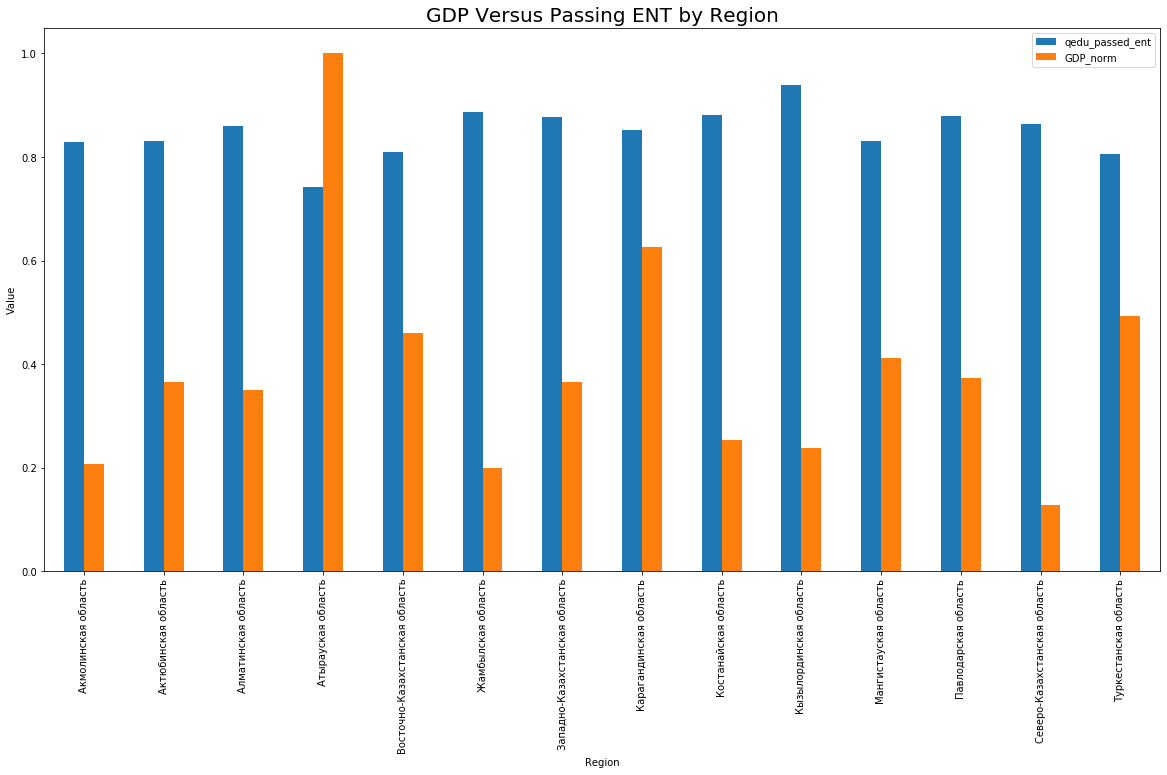

In [59]:
df_stat_gdp.plot(x = 'region', y = ['qedu_passed_ent', 'GDP_norm'], kind = 'bar', figsize = (20,10))

plt.xlabel('Region')
plt.ylabel('Value')
plt.title('GDP Versus Passing ENT by Region', fontsize = 20)

plt.show

In [60]:
df_stat_gdp["Higher_edu_teachers_norm"] = ""
df_stat_gdp["Higher_edu_teachers_norm"] = df_stat_gdp["higher_edu_teachers_2017"]/df_stat_gdp["higher_edu_teachers_2017"].max()

<function matplotlib.pyplot.show(*args, **kw)>

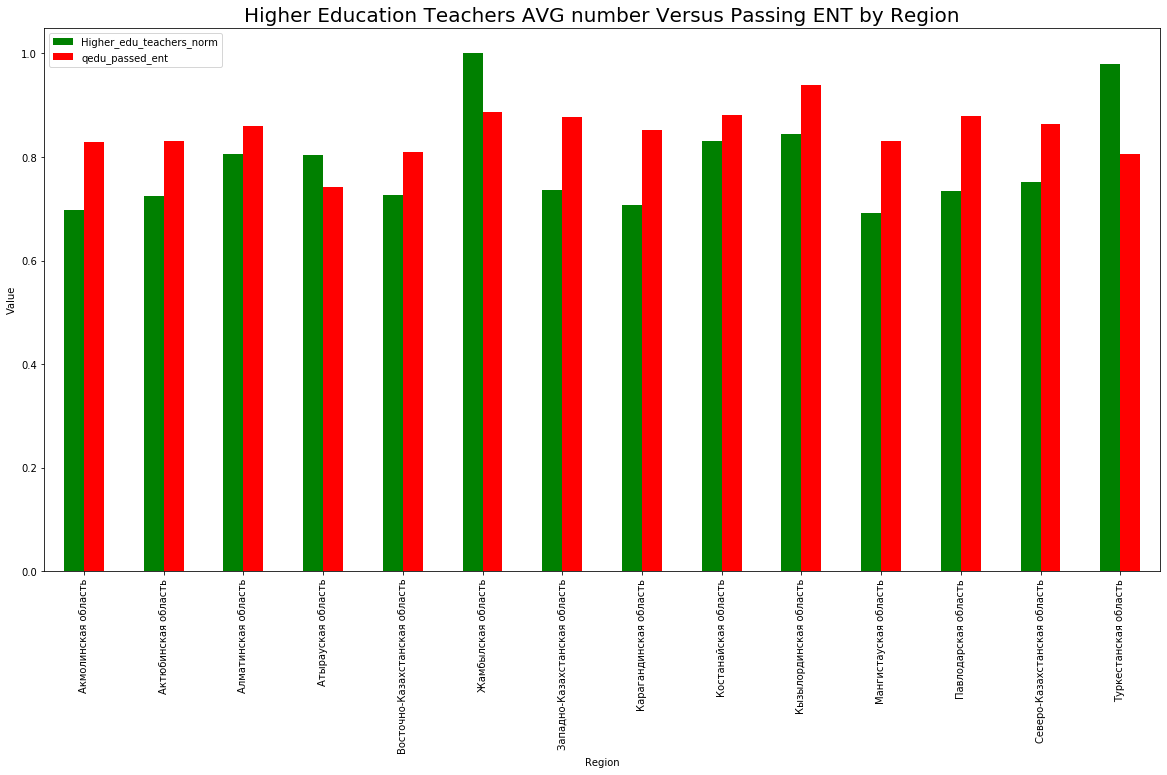

In [61]:
df_stat_gdp.plot(x = 'region', y = ['Higher_edu_teachers_norm', 'qedu_passed_ent'], kind = 'bar', figsize = (20,10), color = ['green', 'red'])

plt.xlabel('Region')
plt.ylabel('Value')
plt.title('Higher Education Teachers AVG number Versus Passing ENT by Region', fontsize = 20)

plt.show

In [33]:
#lesson

In [62]:
df_stat_gdp = df_stat_gdp.set_index('region')

In [63]:
df_stat_gdp = df_stat_gdp.drop('% от страны', 1)

In [64]:
df_stat_gdp = df_stat_gdp.drop('higher_edu_teachers_2017', 1)

In [65]:
df_stat_gdp

,qedu_passed_ent,qedu_continued_education,GDP_norm,Higher_edu_teachers_norm
region,,,,
Акмолинская область,0.829665,0.993722,0.206349,0.697979
Актюбинская область,0.830858,0.992715,0.365079,0.725041
Алматинская область,0.859183,0.990092,0.349206,0.806616
Атырауская область,0.742401,0.997132,1.000000,0.804751
Восточно-Казахстанская область,0.810315,0.992686,0.460317,0.726275
Жамбылская область,0.886841,0.991793,0.198413,1.000000
Западно-Казахстанская область,0.876527,0.996261,0.365079,0.735646
Карагандинская область,0.852747,0.991286,0.626984,0.707139
Костанайская область,0.881999,0.990547,0.253968,0.830332


In [66]:
import seaborn as sns
import numpy as np

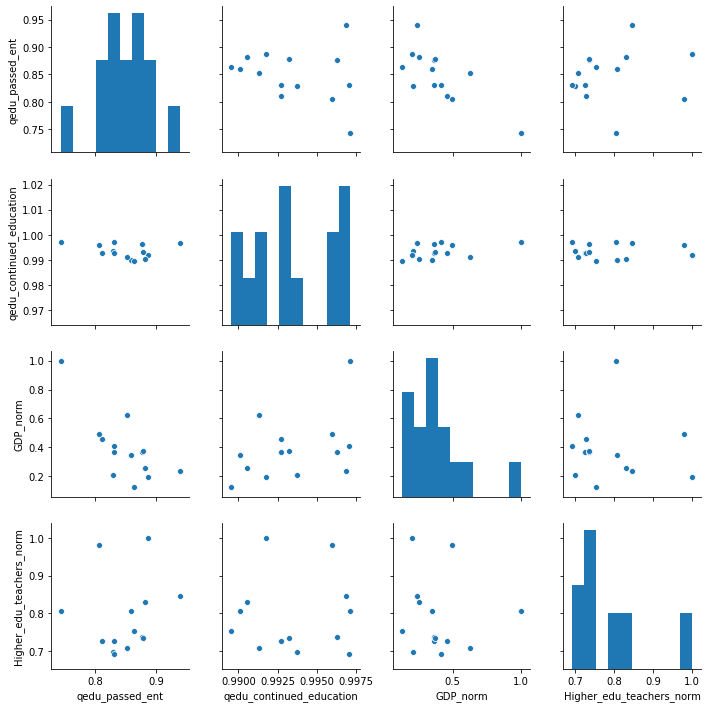

In [67]:
sns.pairplot(df_stat_gdp)

In [112]:
data = pd.merge(left = df, right = df_gdp, how = 'left', on = 'region')

In [79]:
data[['school_type', 'percentage']]

,school_type,percentage
0,"общеобразовательная школа, опорная школа (ресу...",2.6%
1,общеобразовательная школа,2.6%
2,"общеобразовательная школа, интернат при общеоб...",2.6%
3,общеобразовательная школа,2.6%
4,"общеобразовательная школа, малокомплектная шко...",2.6%
...,...,...
6059,общеобразовательная школа,6.2%
6060,начальная школа,6.2%
6061,"общеобразовательная школа, школа-гимназия",6.2%
6062,общеобразовательная школа,6.2%


In [113]:
data.head()

,ID,region,school_type,total_students_2018,total_after_9_2018,total_after_11_2018,diff_teens_2018,deficit_places_2018,3_times_school_2018,barrier_free_2018,...,total_students_11,nationality_diversity_index,load_ratio,drinking_water_presence,qedu_top_uni,qedu_passed_ent,qedu_continued_education,qedu_elite_achievements,2017,percentage
0,1,Акмолинская область,"общеобразовательная школа, опорная школа (ресу...",833,70,42.0,8.0,0.0,0,1,...,0.049587,0.904265,1.366129,да,0.047619,1.000000,1.000000,0.056856,1110777.4,2.6%
1,2,Акмолинская область,общеобразовательная школа,528,52,18.0,0.0,0.0,0,1,...,0.031136,0.889412,1.011111,да,0.222222,1.000000,1.000000,0.014740,1110777.4,2.6%
2,3,Акмолинская область,"общеобразовательная школа, интернат при общеоб...",714,56,37.0,2.0,0.0,0,1,...,0.051813,0.350848,0.919048,да,0.108108,0.909091,1.000000,0.050197,1110777.4,2.6%
3,4,Акмолинская область,общеобразовательная школа,354,33,18.0,0.0,21.0,0,1,...,0.045226,0.861186,1.658333,да,0.000000,0.888889,0.969697,0.000000,1110777.4,2.6%
4,5,Акмолинская область,"общеобразовательная школа, малокомплектная шко...",139,20,15.0,0.0,0.0,0,1,...,0.096154,0.902487,0.331915,да,0.066667,0.857143,1.000000,0.000000,1110777.4,2.6%


In [114]:
data = data.rename(columns = {'% от страны': 'percentage'})

In [115]:
data.head(1)

,ID,region,school_type,total_students_2018,total_after_9_2018,total_after_11_2018,diff_teens_2018,deficit_places_2018,3_times_school_2018,barrier_free_2018,...,total_students_11,nationality_diversity_index,load_ratio,drinking_water_presence,qedu_top_uni,qedu_passed_ent,qedu_continued_education,qedu_elite_achievements,2017,percentage
0,1,Акмолинская область,"общеобразовательная школа, опорная школа (ресу...",833,70,42.0,8.0,0.0,0,1,...,0.049587,0.904265,1.366129,да,0.047619,1.0,1.0,0.056856,1110777.4,2.6%


In [116]:
data = data[[2017,'percentage', 'boys_2017','girls_2017','region', 
      'school_type', 'tip_organizacii_obrazovaniya', 'total_students_2017', 
      'total_teachers_2018', 'teachers_1_category_2018', 
      'high_category_teachers_2018', 'higher_edu_teachers_2017', 'master_teachers', 'qedu_elite_achievements']]

In [117]:
data.head(1)

,2017,percentage,boys_2017,girls_2017,region,school_type,tip_organizacii_obrazovaniya,total_students_2017,total_teachers_2018,teachers_1_category_2018,high_category_teachers_2018,higher_edu_teachers_2017,master_teachers,qedu_elite_achievements
0,1110777.4,2.6%,0.50059,0.49941,Акмолинская область,"общеобразовательная школа, опорная школа (ресу...","Организации среднего образования(начального, о...",847,56.0,39,0,0.979592,0.0,0.056856


In [102]:
new_data = data[[2017, 'region','percentage', 'total_students_2017', 'total_teachers_2018', 'higher_edu_teachers_2017'  ]]

In [103]:
new_data = new_data.rename(columns={2017: '2017'})

In [104]:
new_data.head()

,2017,region,percentage,total_students_2017,total_teachers_2018,higher_edu_teachers_2017
0,1110777.4,Акмолинская область,2.6%,847,56.0,0.979592
1,1110777.4,Акмолинская область,2.6%,546,37.0,0.945946
2,1110777.4,Акмолинская область,2.6%,772,57.0,1.000000
3,1110777.4,Акмолинская область,2.6%,398,36.0,0.864865
4,1110777.4,Акмолинская область,2.6%,156,27.0,0.782609


In [105]:
new_data.dropna(inplace = True)

In [106]:
new_data.shape

(5795, 6)

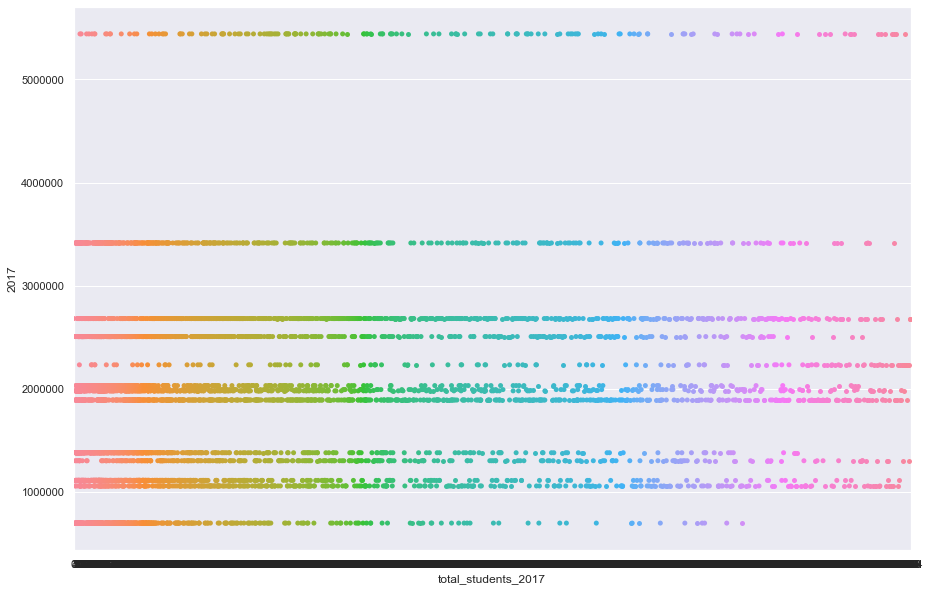

In [100]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.swarmplot(x = 'total_students_2017', y = '2017', data = new_data)

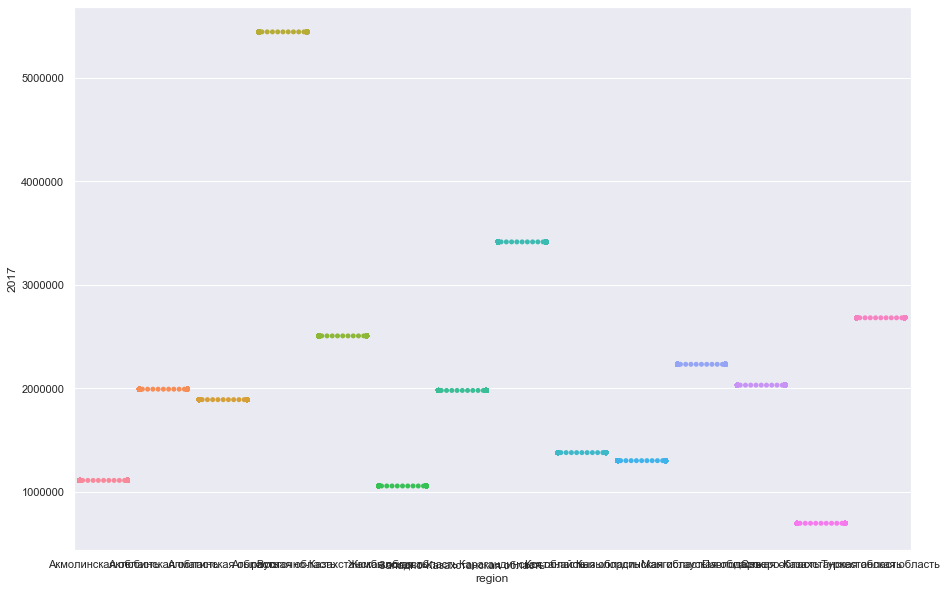

In [107]:
sns.swarmplot(x = 'region', y = '2017', data = new_data)

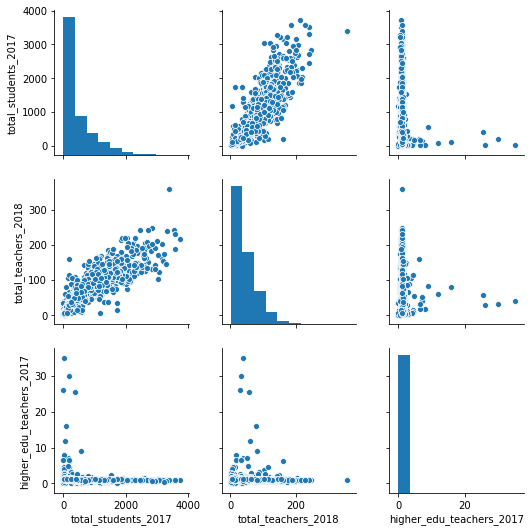

In [84]:
sns.pairplot(new_data)

In [118]:
newdata = data[[2017,'percentage', 'boys_2017','girls_2017','region', 
      'school_type', 'tip_organizacii_obrazovaniya', 'total_students_2017', 
      'total_teachers_2018', 'teachers_1_category_2018', 
      'high_category_teachers_2018', 'higher_edu_teachers_2017', 'master_teachers', 'qedu_elite_achievements' ]]

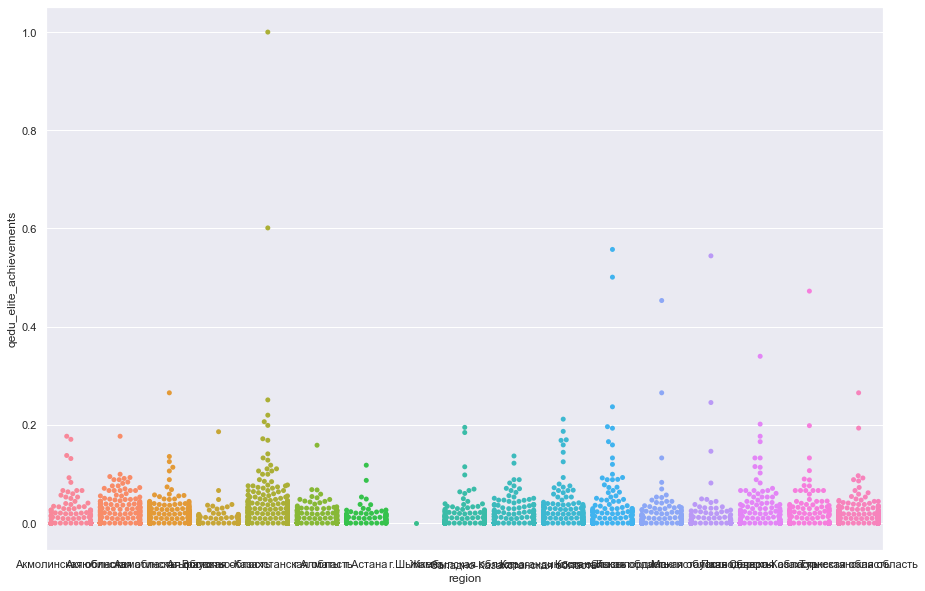

In [119]:
sns.swarmplot(x = 'region', y = 'qedu_elite_achievements', data = newdata)

In [124]:
newdata.dropna(inplace = True)

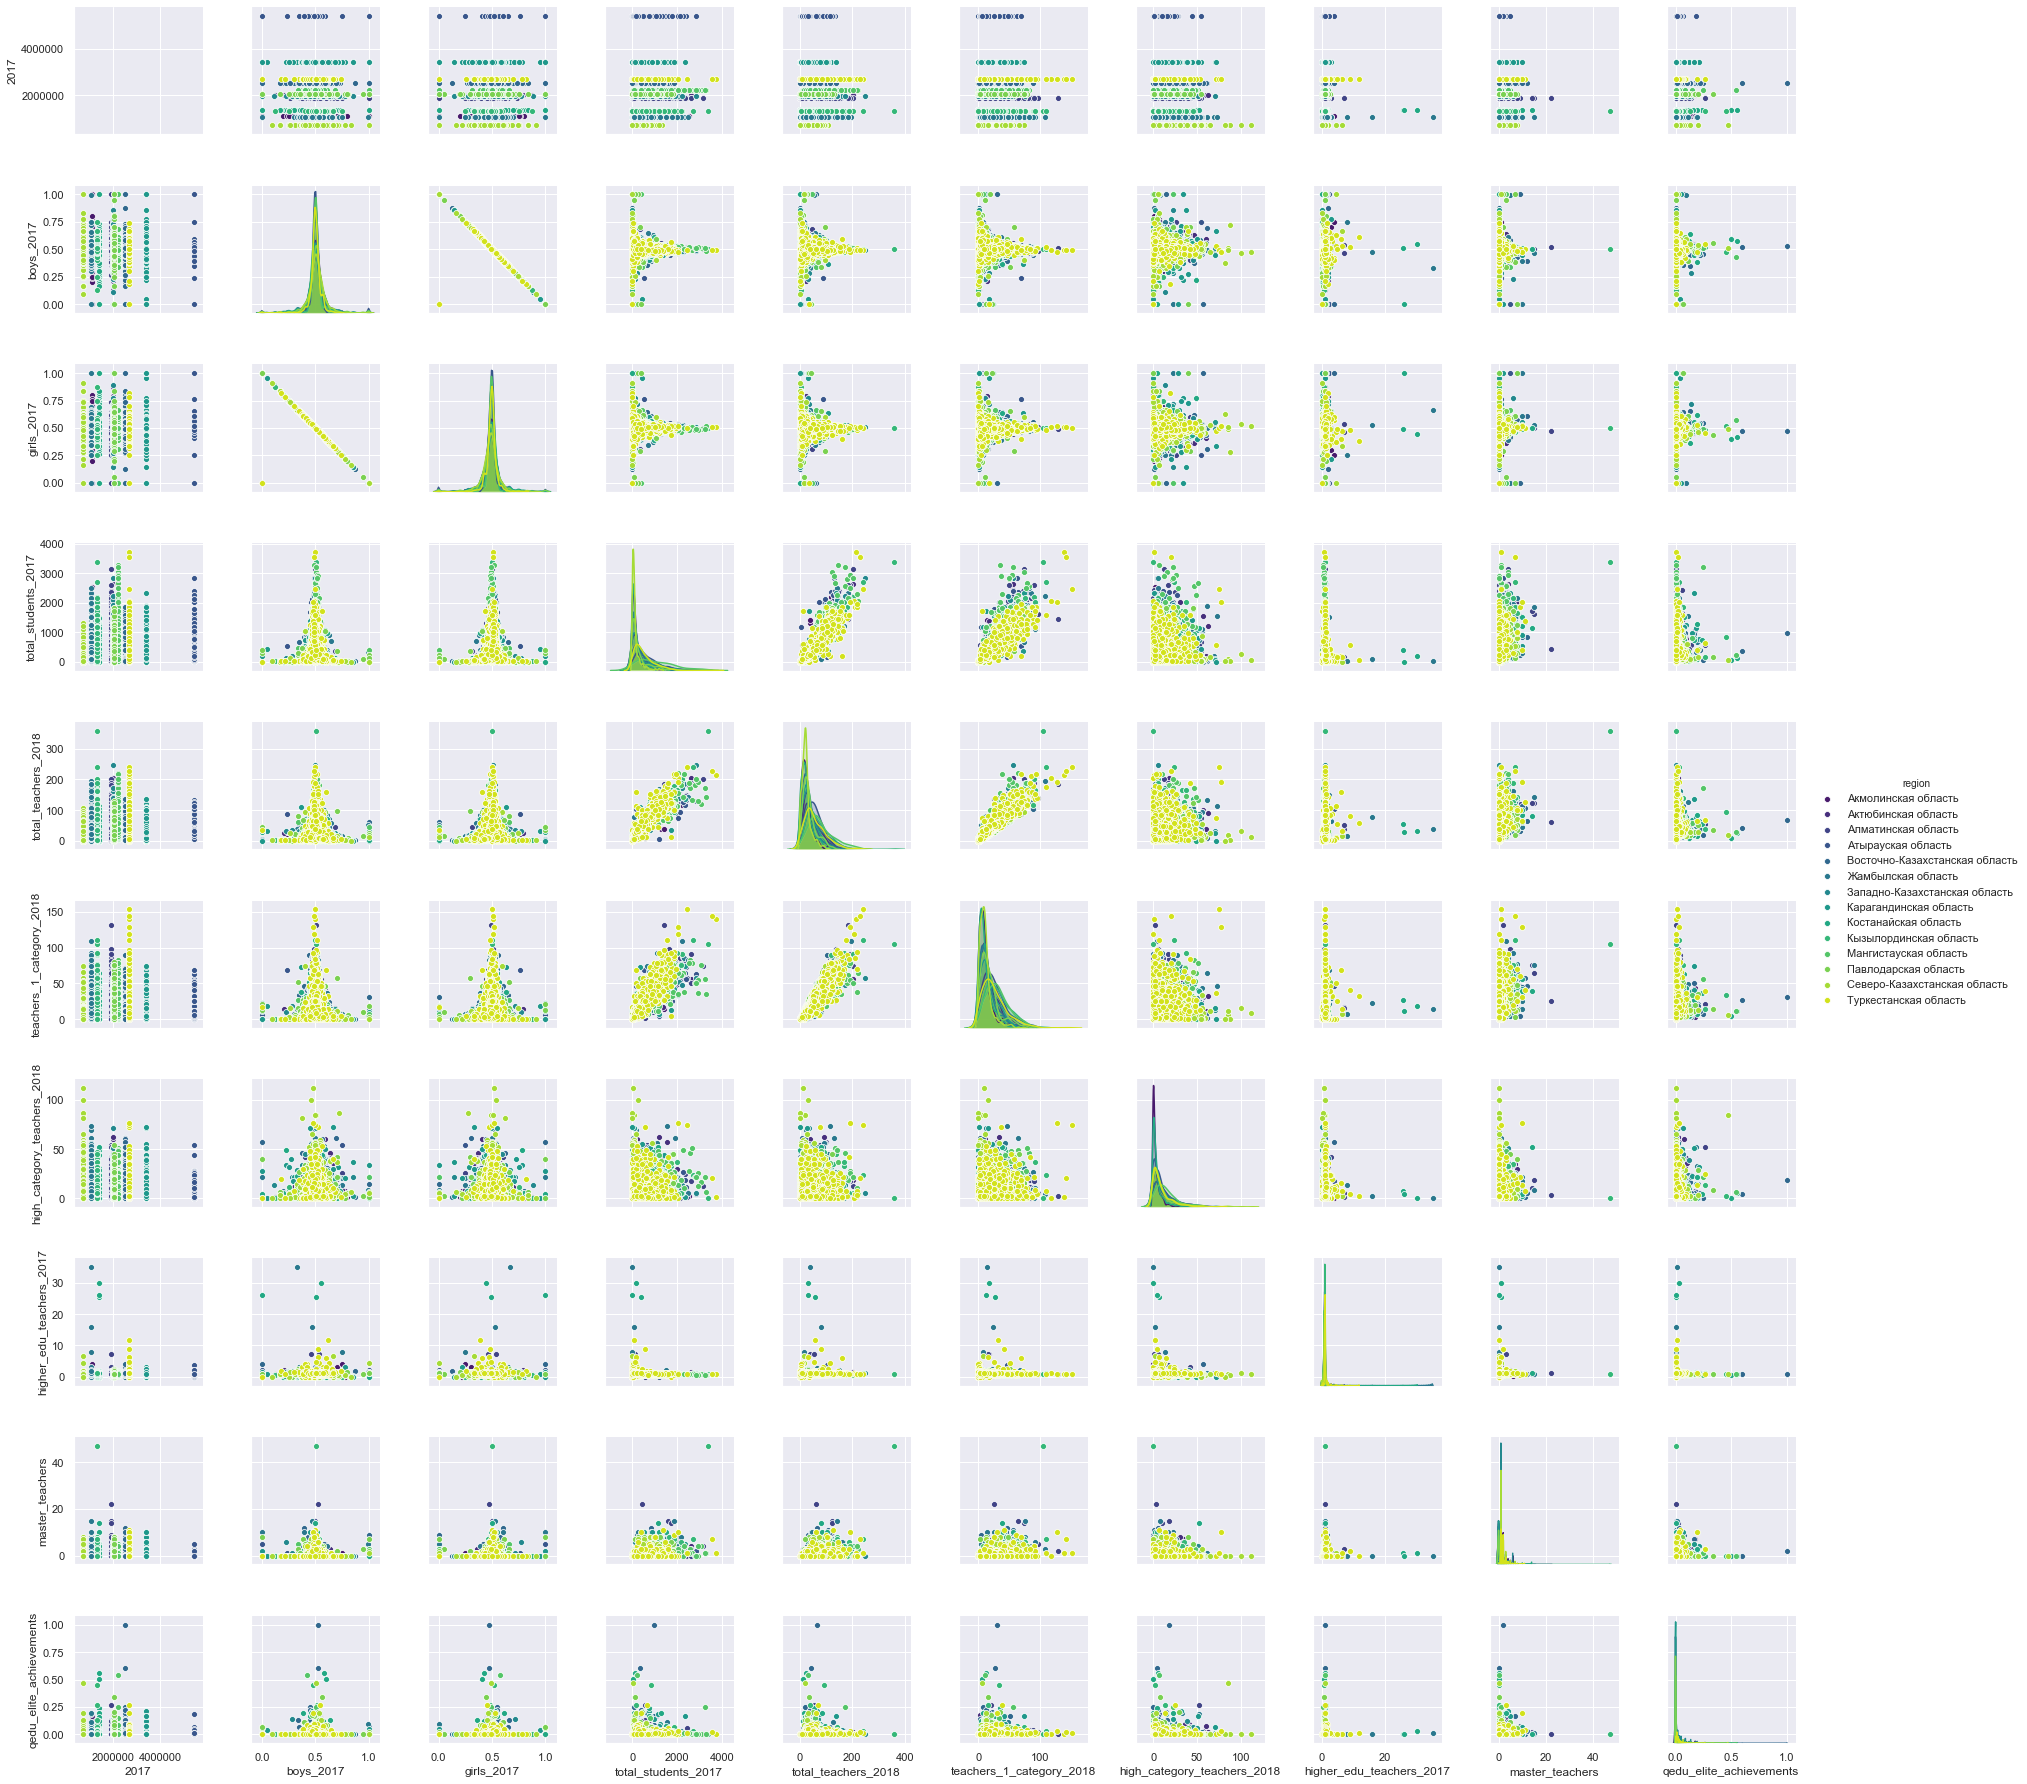

In [127]:
sns.pairplot(newdata, diag_kind = 'kde', hue = 'region', palette = 'viridis')

In [126]:
newdata.head(1)

,2017,percentage,boys_2017,girls_2017,region,school_type,tip_organizacii_obrazovaniya,total_students_2017,total_teachers_2018,teachers_1_category_2018,high_category_teachers_2018,higher_edu_teachers_2017,master_teachers,qedu_elite_achievements
0,1110777.4,2.6%,0.50059,0.49941,Акмолинская область,"общеобразовательная школа, опорная школа (ресу...","Организации среднего образования(начального, о...",847,56.0,39,0,0.979592,0.0,0.056856


In [130]:
newdata.dtypes

2017                            float64
percentage                       object
boys_2017                       float64
girls_2017                      float64
region                           object
school_type                      object
tip_organizacii_obrazovaniya     object
total_students_2017               int64
total_teachers_2018             float64
teachers_1_category_2018          int64
high_category_teachers_2018       int64
higher_edu_teachers_2017        float64
master_teachers                 float64
qedu_elite_achievements         float64
dtype: object

In [131]:
newdata['boys_count'] = newdata['total_students_2017']*newdata['boys_2017']
newdata['girls_count'] = newdata['total_students_2017']*newdata['girls_2017']

In [133]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5795 entries, 0 to 6063
Data columns (total 16 columns):
2017                            5795 non-null float64
percentage                      5795 non-null object
boys_2017                       5795 non-null float64
girls_2017                      5795 non-null float64
region                          5795 non-null object
school_type                     5795 non-null object
tip_organizacii_obrazovaniya    5795 non-null object
total_students_2017             5795 non-null int64
total_teachers_2018             5795 non-null float64
teachers_1_category_2018        5795 non-null int64
high_category_teachers_2018     5795 non-null int64
higher_edu_teachers_2017        5795 non-null float64
master_teachers                 5795 non-null float64
qedu_elite_achievements         5795 non-null float64
boys_count                      5795 non-null float64
girls_count                     5795 non-null float64
dtypes: float64(9), int64(3), object(4)

In [138]:
by_region = newdata.groupby(['region', 
                             'tip_organizacii_obrazovaniya']).sum()[['boys_count', 
                                                                     'girls_count', 
                                                                     2017, 
                                                                     'total_students_2017', 
                                                                     'total_teachers_2018']]
by_region.shape

(28, 5)

In [139]:
by_region.head()

boys_count  \
region              tip_organizacii_obrazovaniya                                     
Акмолинская область Организации среднего образования(начального, ос...     57095.0   
                    Специализированные организации образования               222.0   
Актюбинская область Организации среднего образования(начального, ос...     62578.0   
                    Специализированные организации образования               616.0   
Алматинская область Организации среднего образования(начального, ос...    192455.0   

                                                                        girls_count  \
region              tip_organizacii_obrazovaniya                                      
Акмолинская область Организации среднего образования(начального, ос...      55633.0   
                    Специализированные организации образования                  0.0   
Актюбинская область Организации среднего образования(начального, ос...      61001.0   
                    Специализированные организации образования                319.0   
Алматинская область Организации среднего образования(начального, ос...     187355.0   

                                                                                2017  \
region              tip_organizacii_obrazovaniya                                       
Акмолинская область Организации среднего образования(начального, ос...  5.387270e+08   
                    Специализированные организации образования          1.110777e+06   
Актюбинская область Организации среднего образования(начального, ос...  6.194418e+08   
                    Специализированные организации образования          5.975323e+06   
Алматинская область Организации среднего образования(начального, ос...  1.298825e+09   

                                                                        total_students_2017  \
region              tip_organizacii_obrazovaniya                                              
Акмолинская область Организации среднего образования(начального, ос...               112728   
                    Специализированные организации образования                          222   
Актюбинская область Организации среднего образования(начального, ос...               123579   
                    Специализированные организации образования                          935   
Алматинская область Организации среднего образования(начального, ос...               379810   

                                                                        total_teachers_2018  
region              tip_organizacii_obrazovaniya                                             
Акмолинская область Организации среднего образования(начального, ос...              12751.0  
                    Специализированные организации образования                         32.0  
Актюбинская область Организации среднего образования(начального, ос...              13743.0  
                    Специализированные организации образования                        155.0  
Алматинская область Организации среднего образования(начального, ос...              35356.0

In [143]:
by_region.reset_index(inplace = True)

In [145]:
by_region = by_region.replace({'Организации среднего образования(начального, основного среднего и общего среднего)' : 1, 
                               'Специализированные организации образования' : 2, '0': 0, 
                               'Организации образования для детей-сирот и детей, оставшихся без попечения родителей': 3 })   

In [144]:
by_region['tip_organizacii_obrazovaniya'].unique()

array(['Организации среднего образования(начального, основного среднего и общего среднего)',
       'Специализированные организации образования',
       'Организации образования для детей-сирот и детей, оставшихся без попечения родителей'],
      dtype=object)

In [146]:
by_region.head()

,region,tip_organizacii_obrazovaniya,boys_count,girls_count,2017,total_students_2017,total_teachers_2018
0,Акмолинская область,1,57095.0,55633.0,5.387270e+08,112728,12751.0
1,Акмолинская область,2,222.0,0.0,1.110777e+06,222,32.0
2,Актюбинская область,1,62578.0,61001.0,6.194418e+08,123579,13743.0
3,Актюбинская область,2,616.0,319.0,5.975323e+06,935,155.0
4,Алматинская область,1,192455.0,187355.0,1.298825e+09,379810,35356.0


In [147]:
by_region.shape

(28, 7)

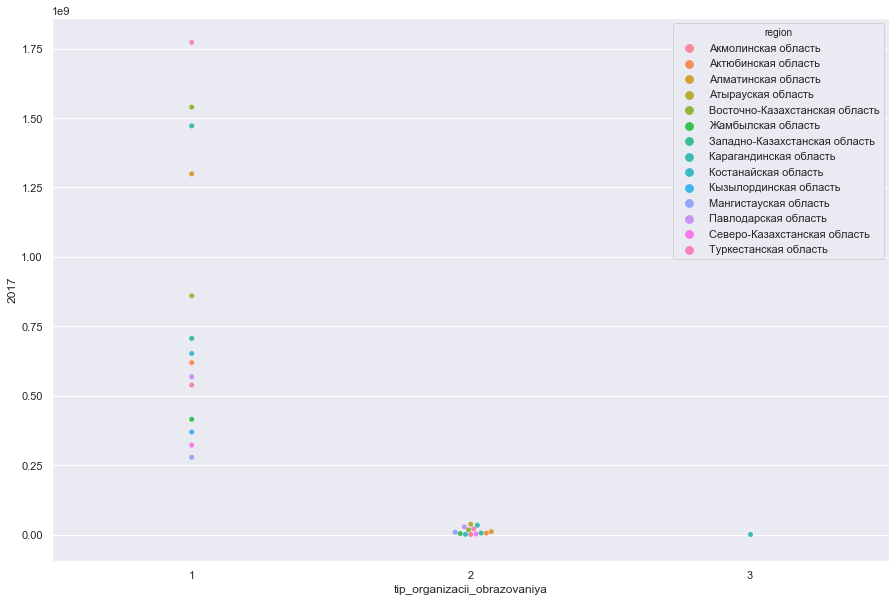

In [152]:
sns.swarmplot(data = by_region, x = 'tip_organizacii_obrazovaniya', y = 2017, hue = 'region')

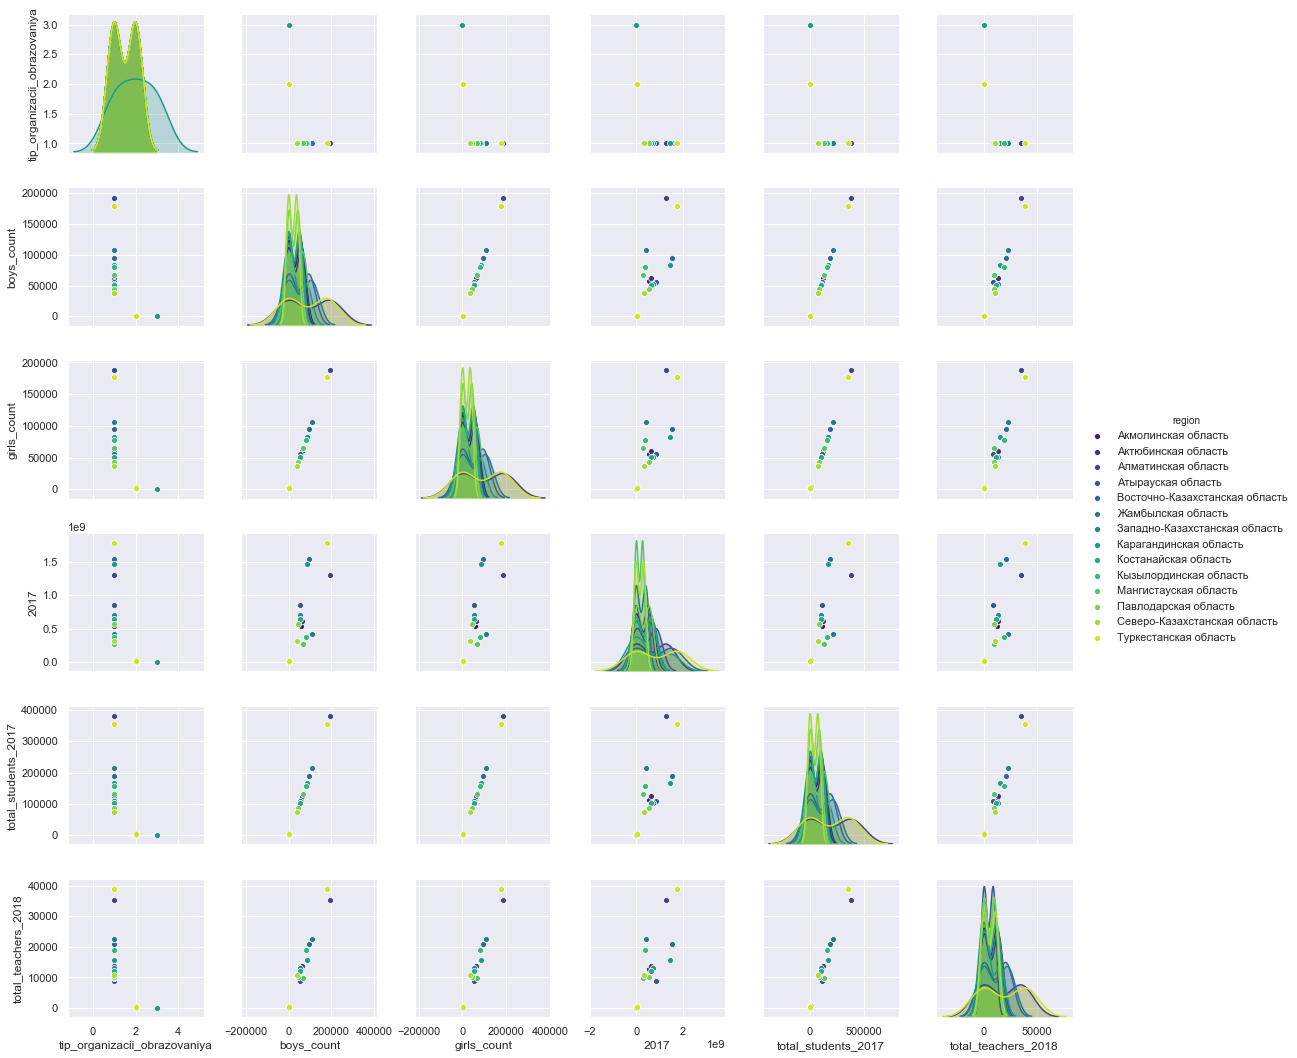

In [155]:
sns.pairplot(by_region, diag_kind = 'kde', hue = 'region', palette = 'viridis')

(0, 200000)

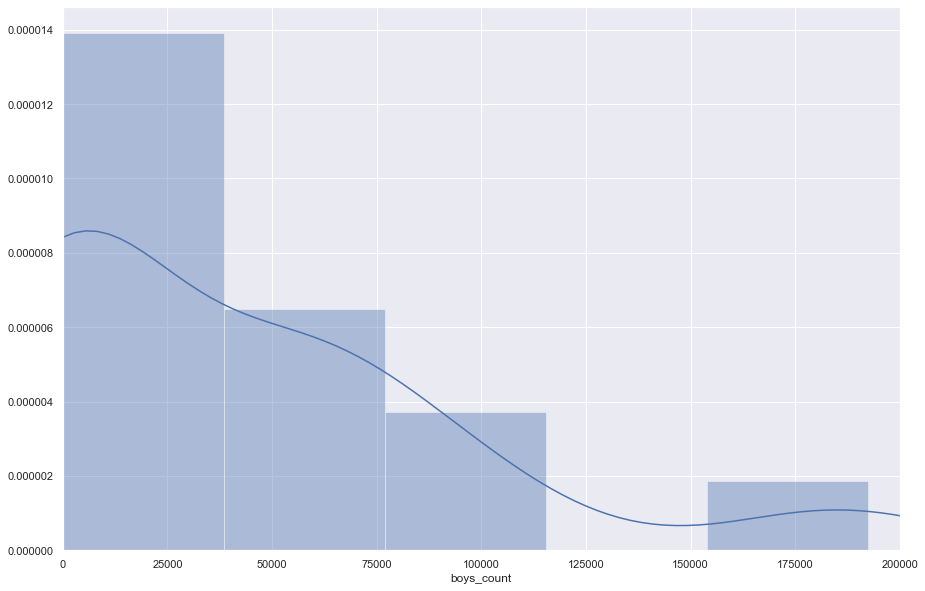

In [161]:
sns.distplot(by_region['boys_count'])
plt.xlim([0, 200000])

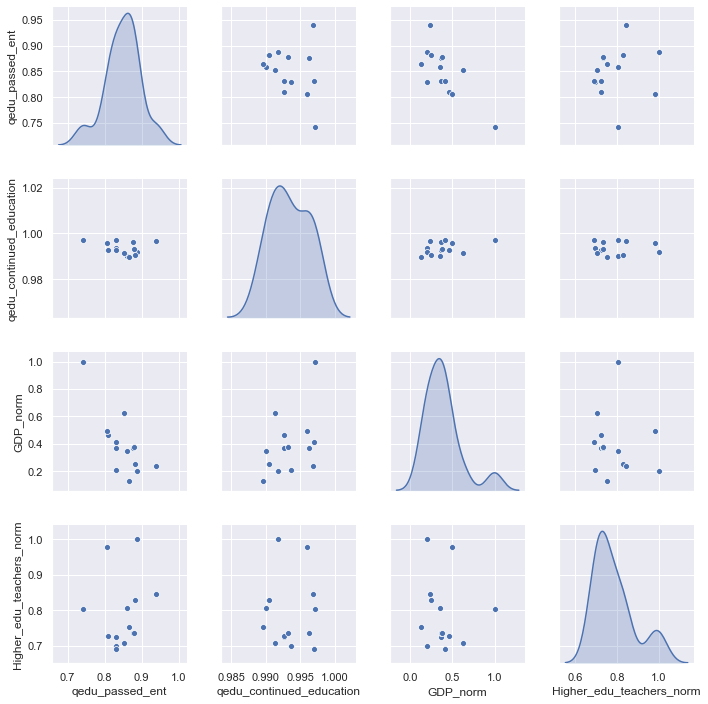

In [164]:
sns.pairplot(df_stat_gdp, diag_kind = 'kde')

In [162]:
df_stat_gdp

,qedu_passed_ent,qedu_continued_education,GDP_norm,Higher_edu_teachers_norm
region,,,,
Акмолинская область,0.829665,0.993722,0.206349,0.697979
Актюбинская область,0.830858,0.992715,0.365079,0.725041
Алматинская область,0.859183,0.990092,0.349206,0.806616
Атырауская область,0.742401,0.997132,1.000000,0.804751
Восточно-Казахстанская область,0.810315,0.992686,0.460317,0.726275
Жамбылская область,0.886841,0.991793,0.198413,1.000000
Западно-Казахстанская область,0.876527,0.996261,0.365079,0.735646
Карагандинская область,0.852747,0.991286,0.626984,0.707139
Костанайская область,0.881999,0.990547,0.253968,0.830332


In [ ]:
#lesson_end

### 1)	Напишите программу, которая автоматически разделит ваш файл на 16 файлов по регионам

In [42]:
grouped_df = df.groupby('region')

for data in grouped_df:
    grouped_df.get_group(data[0]).to_excel("C:/Users/dmretiv/Desktop/projects/dsacademy-python/schools-data/"+data[0]+".xlsx")

### 2)	Напишите программу, которая выведет чёрный список школ по значению колонки qedu_passed_ent (количество набравших проходной балл ЕНТ) – например те школы, в которых qedu_passed_ent меньше 0.5. Программа должна выводить отдельный чёрный список для каждого региона

In [72]:
df_blacklist = df[df['qedu_passed_ent'] < 0.5].reset_index(drop = True)

In [73]:
df_blacklist.shape

(110, 211)

In [74]:
df_blacklist = df_blacklist[['ID','region','school_type','qedu_passed_ent']]

In [75]:
df_blacklist.head(20)

,ID,region,school_type,qedu_passed_ent
0,58,Акмолинская область,"общеобразовательная школа, малокомплектная школа",0.400000
1,136,Акмолинская область,общеобразовательная школа,0.000000
2,146,Акмолинская область,"общеобразовательная школа, малокомплектная школа",0.200000
3,173,Акмолинская область,"общеобразовательная школа, малокомплектная школа",0.333333
4,424,Акмолинская область,"общеобразовательная школа, малокомплектная школа",0.428571
5,81161,Акмолинская область,"общеобразовательная школа, малокомплектная школа",0.000000
6,87080,Акмолинская область,"общеобразовательная школа, малокомплектная школа",0.333333
7,1267,Актюбинская область,"общеобразовательная школа, малокомплектная школа",0.250000
8,1270,Актюбинская область,"общеобразовательная школа, малокомплектная школа",0.333333
9,1280,Актюбинская область,общеобразовательная школа,0.222222


In [76]:
df_blacklist["region"].unique()

array(['Акмолинская область', 'Актюбинская область',
       'Алматинская область', 'Атырауская область',
       'Восточно-Казахстанская область', 'г.Астана', 'Жамбылская область',
       'Западно-Казахстанская область', 'Карагандинская область',
       'Костанайская область', 'Мангистауская область',
       'Павлодарская область', 'Северо-Казахстанская область',
       'Туркестанская область'], dtype=object)

In [77]:
df["region"].unique()

array(['Акмолинская область', 'Актюбинская область',
       'Алматинская область', 'Атырауская область',
       'Восточно-Казахстанская область', 'г.Алматы', 'г.Астана',
       'г.Шымкент', 'Жамбылская область', 'Западно-Казахстанская область',
       'Карагандинская область', 'Костанайская область',
       'Кызылординская область', 'Мангистауская область',
       'Павлодарская область', 'Северо-Казахстанская область',
       'Туркестанская область'], dtype=object)

In [78]:
df_blacklist.set_index(['region', 'ID'], inplace=True)

In [79]:
df_blacklist.head(20)

school_type  \
region              ID                                                        
Акмолинская область 58     общеобразовательная школа, малокомплектная школа   
                    136                           общеобразовательная школа   
                    146    общеобразовательная школа, малокомплектная школа   
                    173    общеобразовательная школа, малокомплектная школа   
                    424    общеобразовательная школа, малокомплектная школа   
                    81161  общеобразовательная школа, малокомплектная школа   
                    87080  общеобразовательная школа, малокомплектная школа   
Актюбинская область 1267   общеобразовательная школа, малокомплектная школа   
                    1270   общеобразовательная школа, малокомплектная школа   
                    1280                          общеобразовательная школа   
                    1301                          общеобразовательная школа   
                    1323   общеобразовательная школа, малокомплектная школа   
                    1360   общеобразовательная школа, малокомплектная школа   
                    2042                          общеобразовательная школа   
                    81217  общеобразовательная школа, малокомплектная школа   
                    81549  общеобразовательная школа, малокомплектная школа   
                    81660  общеобразовательная школа, малокомплектная школа   
Алматинская область 936                           общеобразовательная школа   
                    970                           общеобразовательная школа   
                    998                           общеобразовательная школа   

                           qedu_passed_ent  
region              ID                      
Акмолинская область 58            0.400000  
                    136           0.000000  
                    146           0.200000  
                    173           0.333333  
                    424           0.428571  
                    81161         0.000000  
                    87080         0.333333  
Актюбинская область 1267          0.250000  
                    1270          0.333333  
                    1280          0.222222  
                    1301          0.333333  
                    1323          0.000000  
                    1360          0.444444  
                    2042          0.333333  
                    81217         0.000000  
                    81549         0.250000  
                    81660         0.400000  
Алматинская область 936           0.375000  
                    970           0.000000  
                    998           0.444444

### 2.1) Выведите список школ с проблемами с материальной обеспеченностью (например, те школы, где требуется капитальный ремонт, туалеты на улицах, нет горячего питания) – конкретные условия на ваше усмотрение


In [80]:
df.columns.tolist()

['ID',
 'region',
 'school_type',
 'total_students_2018',
 'total_after_9_2018',
 'total_after_11_2018',
 'diff_teens_2018',
 'deficit_places_2018',
 '3_times_school_2018',
 'barrier_free_2018',
 'stud_have_book_count_2018',
 'ip_higher_4mb_2018',
 'poor_fams_2018',
 'poor_fams_food_2018',
 'dorms_for_villages_2018',
 'total_teachers_2018',
 'teachers_1_category_2018',
 'higher_edu_teachers_2017',
 'master_teachers',
 'out_of_system_teachers_2018',
 'in_emergency_2018',
 'need_repair_2018',
 'school_city_dist',
 'only_out_toilet_2018',
 'school_density_in_10km',
 'school_density_in_3km',
 'school_density_in1.5km',
 'out_in_toilets_2018',
 'total_comp_2018',
 'interactive_boards_2017',
 'cameras__2017',
 'messa_2018',
 'sport_stud',
 'art_stud',
 'appl_art_stud',
 'technical_stud',
 'soc_student',
 'bio_eco_stud',
 'tourist_stud',
 'nat_math_stud',
 'lang_stud',
 'other_stud',
 'add_edu_stud',
 'high_category_teachers_2018',
 'eng_informatics_teachers',
 'eng_phys_teachers',
 'eng_chem_

#### Выборочные колонки, которые показывают мат обеспеченность:


* 'free_hot_food_2017',
* 'building_condition_2017',
* 'need_repair_2018'
* 'hot_water_2017',
* 'toilet_2017'
* 'only_out_toilet_2018'
* 'out_in_toilets_2018',
* 'gym_equipment_2017',
* 'computer_availability_2017',
* 'computer_availability_2017',
* 'computer_overall_2017',
* 'computer_w_internet_2017',
* 'library_books_overall'

In [81]:
df_cond = df[['ID', 'region', 'free_hot_food_2017',
                     'building_condition_2017', 'hot_water_2017',
                     'toilet_2017',
                     'computer_availability_2017',
                     'library_books_overall']]

In [82]:
df_cond

,ID,region,free_hot_food_2017,building_condition_2017,hot_water_2017,toilet_2017,computer_availability_2017,library_books_overall
0,1,Акмолинская область,0.465171,проведён,нет,наличие теплых и надворных туалетов,да,58.635183
1,2,Акмолинская область,0.424908,требует,нет,наличие только теплых туалетов,да,42.785714
2,3,Акмолинская область,0.466321,проведён,нет,наличие только теплых туалетов,да,54.025907
3,4,Акмолинская область,0.000000,требует,нет,наличие только теплых туалетов,да,54.221106
4,5,Акмолинская область,0.448718,требует,нет,наличие теплых и надворных туалетов,да,94.115385
...,...,...,...,...,...,...,...,...
6059,96713,Туркестанская область,0.045455,требует,да,наличие теплых и надворных туалетов,да,10.177273
6060,97100,Туркестанская область,0.000000,требует,да,наличие теплых и надворных туалетов,нет,8.660377
6061,97197,Туркестанская область,0.000000,требует,нет,наличие только надворных туалетов,да,13.896657
6062,97231,Туркестанская область,0.000000,требует,да,наличие теплых и надворных туалетов,да,8.426724


In [83]:
df_cond["toilet_2017"].unique()

array(['наличие теплых и надворных туалетов',
       'наличие только теплых туалетов',
       'наличие только надворных туалетов', 'нет'], dtype=object)

In [84]:
df_cond["building_condition_2017"].unique()

array(['проведён', 'требует', 'аварийные'], dtype=object)

In [85]:
df_cond["computer_availability_2017"].unique()

array(['да', 'нет'], dtype=object)

In [86]:
df_cond['hot_water_2017'].unique()

array(['нет', 'да', 'нет,да', '0'], dtype=object)

In [90]:
df_cond['free_hot_food_2017'].describe()

count    6064.000000
mean        0.181992
std         0.219458
min         0.000000
25%         0.028044
50%         0.102679
75%         0.245651
max         1.000000
Name: free_hot_food_2017, dtype: float64

In [89]:
df_cond['library_books_overall'].describe()

count    6064.000000
mean       65.043176
std        83.215198
min         0.000000
25%        28.107077
50%        42.195005
75%        72.374199
max      1756.500000
Name: library_books_overall, dtype: float64

In [89]:
df_cond['library_books_overall'].describe()

count    6064.000000
mean       65.043176
std        83.215198
min         0.000000
25%        28.107077
50%        42.195005
75%        72.374199
max      1756.500000
Name: library_books_overall, dtype: float64

In [91]:
replace_build_values = {'проведён' : 1, 'требует' : 0, 'аварийные' : 0 }       
df_cond = df_cond.replace({"building_condition_2017": replace_build_values})      

replace_toilet_values = {'наличие теплых и надворных туалетов' : 1, 'наличие только теплых туалетов' : 1, 'наличие только теплых туалетов' : 1, 'наличие только надворных туалетов' : 0, 'нет' : 0 }      
df_cond = df_cond.replace({"toilet_2017": replace_toilet_values})     

replace_comp_values = {'да' : 1, 'нет' : 0 }       
df_cond = df_cond.replace({"computer_availability_2017": replace_comp_values})     

replace_hotwater_values = {'да' : 1, 'нет' : 0, '0': 0, 'нет,да': 0 }       
df_cond = df_cond.replace({"hot_water_2017": replace_hotwater_values})     

df_cond['free_hot_food_2017'] = df_cond['free_hot_food_2017'].apply(lambda x: 0 if x < 0.5 else 1)

df_cond['library_books_overall'] = df_cond['library_books_overall'].apply(lambda x: 0 if x < 300 else 1)

df_cond.head(10)

,ID,region,free_hot_food_2017,building_condition_2017,hot_water_2017,toilet_2017,computer_availability_2017,library_books_overall
0,1,Акмолинская область,0,1,0,1,1,0
1,2,Акмолинская область,0,0,0,1,1,0
2,3,Акмолинская область,0,1,0,1,1,0
3,4,Акмолинская область,0,0,0,1,1,0
4,5,Акмолинская область,0,0,0,1,1,0
5,6,Акмолинская область,0,1,0,1,1,1
6,7,Акмолинская область,1,1,1,1,1,0
7,8,Акмолинская область,0,0,1,1,1,0
8,9,Акмолинская область,1,0,0,1,1,0
9,10,Акмолинская область,0,1,1,1,1,0


In [92]:
df_cond['sum_cond'] = df_cond['free_hot_food_2017'] + df_cond['building_condition_2017'] + df_cond['hot_water_2017'] + df_cond['toilet_2017'] + df_cond['computer_availability_2017'] + df_cond['library_books_overall']

In [96]:
df_cond.shape

(6064, 9)

In [93]:
df_cond.head(3)

,ID,region,free_hot_food_2017,building_condition_2017,hot_water_2017,toilet_2017,computer_availability_2017,library_books_overall,sum_cond
0,1,Акмолинская область,0,1,0,1,1,0,3
1,2,Акмолинская область,0,0,0,1,1,0,2
2,3,Акмолинская область,0,1,0,1,1,0,3


In [94]:
df_low_cond = df_cond[df_cond['sum_cond'] < 4]

In [95]:
df_low_cond.shape

(5108, 9)

### 3) На основании колонок eng_informatics_teachers, eng_phys_teachers, eng_chem_teachers и eng_bio_teachers составьте два отчёта:

#### 3.1) Топ школ по количеству учителей, владеющих английским языком

In [97]:
df_eng = df[['region', 'ID', 
             'eng_informatics_teachers',
             'eng_phys_teachers',
             'eng_chem_teachers',
             'eng_bio_teachers']]

In [98]:
df_eng

,region,ID,eng_informatics_teachers,eng_phys_teachers,eng_chem_teachers,eng_bio_teachers
0,Акмолинская область,1,0,1,1,1
1,Акмолинская область,2,0,1,0,0
2,Акмолинская область,3,0,0,1,0
3,Акмолинская область,4,0,0,0,1
4,Акмолинская область,5,0,0,0,0
...,...,...,...,...,...,...
6059,Туркестанская область,96713,0,0,0,0
6060,Туркестанская область,97100,0,0,0,0
6061,Туркестанская область,97197,0,0,1,0
6062,Туркестанская область,97231,0,0,0,0


In [99]:
df_eng["sum_eng_teachers"] = df_eng['eng_informatics_teachers'] + df_eng['eng_phys_teachers'] + df_eng['eng_chem_teachers'] + df_eng['eng_bio_teachers']

In [100]:
df_eng.head()

,region,ID,eng_informatics_teachers,eng_phys_teachers,eng_chem_teachers,eng_bio_teachers,sum_eng_teachers
0,Акмолинская область,1,0,1,1,1,3
1,Акмолинская область,2,0,1,0,0,1
2,Акмолинская область,3,0,0,1,0,1
3,Акмолинская область,4,0,0,0,1,1
4,Акмолинская область,5,0,0,0,0,0


In [101]:
df_eng = df_eng.sort_values(by ='sum_eng_teachers' , ascending=False).reset_index(drop = True)

In [102]:
df_eng.head(30)

,region,ID,eng_informatics_teachers,eng_phys_teachers,eng_chem_teachers,eng_bio_teachers,sum_eng_teachers
0,Жамбылская область,1886,3,3,2,5,13
1,Кызылординская область,6825,4,3,3,3,13
2,Кызылординская область,6868,4,2,2,4,12
3,г.Астана,4672,4,2,2,4,12
4,Жамбылская область,1891,5,4,0,3,12
5,Жамбылская область,1990,4,3,2,3,12
6,Туркестанская область,2794,5,0,3,3,11
7,Жамбылская область,1888,3,3,2,3,11
8,г.Алматы,1573,5,4,0,1,10
9,г.Алматы,1559,5,2,0,3,10


#### 3.2) Отдельные отчёты с топом школ по каждый специальности (informatics, phys, chem, bio)

In [105]:
df_eng_info = df[['region', 'ID', 'eng_informatics_teachers']]
df_eng_info = df_eng_info.sort_values(by ='eng_informatics_teachers' , ascending=False).reset_index(drop = True)
df_eng_info = df_eng_info.head(10)
df_eng_info


,region,ID,eng_informatics_teachers
0,Туркестанская область,2794,5
1,г.Алматы,1573,5
2,Мангистауская область,80526,5
3,Жамбылская область,1891,5
4,Жамбылская область,1885,5
5,г.Алматы,1559,5
6,Кызылординская область,6868,4
7,Кызылординская область,6827,4
8,Кызылординская область,6825,4
9,г.Алматы,1683,4


In [106]:
df_eng_phys = df[['region', 'ID', 'eng_phys_teachers']]
df_eng_phys = df_eng_phys.sort_values(by ='eng_phys_teachers' , ascending=False).reset_index(drop = True)
df_eng_phys = df_eng_phys.head(10)
df_eng_phys


,region,ID,eng_phys_teachers
0,Западно-Казахстанская область,3258,5
1,г.Алматы,1573,4
2,Жамбылская область,1891,4
3,Жамбылская область,2083,3
4,Западно-Казахстанская область,4128,3
5,Туркестанская область,2346,3
6,Восточно-Казахстанская область,3635,3
7,г.Алматы,1685,3
8,Жамбылская область,1990,3
9,Жамбылская область,1888,3


In [107]:
df_eng_chem = df[['region', 'ID', 'eng_chem_teachers']]
df_eng_chem = df_eng_chem.sort_values(by ='eng_chem_teachers' , ascending=False).reset_index(drop = True)
df_eng_chem = df_eng_chem.head(10)
df_eng_chem

,region,ID,eng_chem_teachers
0,Западно-Казахстанская область,4239,4
1,Западно-Казахстанская область,4127,4
2,Кызылординская область,6825,3
3,Туркестанская область,2794,3
4,Карагандинская область,2961,3
5,Карагандинская область,2962,3
6,Туркестанская область,2590,3
7,Кызылординская область,6593,3
8,Жамбылская область,2084,3
9,Мангистауская область,80513,2


In [108]:
df_eng_bio = df[['region', 'ID', 'eng_bio_teachers']]
df_eng_bio = df_eng_bio.sort_values(by ='eng_bio_teachers' , ascending=False).reset_index(drop = True)
df_eng_bio = df_eng_bio.head(10)
df_eng_bio

,region,ID,eng_bio_teachers
0,Жамбылская область,1886,5
1,Западно-Казахстанская область,3808,4
2,Кызылординская область,6831,4
3,Жамбылская область,1884,4
4,г.Астана,4672,4
5,г.Астана,4407,4
6,г.Астана,3647,4
7,Жамбылская область,2021,4
8,Кызылординская область,6868,4
9,Восточно-Казахстанская область,3638,4


### 4) Выведите один файл с статистикой по каждому населённому пункту. Необходимо посчитать для каждого населённого пункта: количество школ, процент школ с доступом в интернет, наличие хотя бы одной школы без доступа к питьевой воде (да или нет).

#### 4.1) По своему усмотрению добавьте другие статистики и агрегаты в этот отчёт по населённым пунктам. Попробуйте найти в этом отчёте какие-то инсайты, проведите анализ.

In [128]:
df_stat = df[['ID', 'region','drinking_water_presence', 'computer_w_internet_2017']]
df_stat.head()

,ID,region,drinking_water_presence,computer_w_internet_2017
0,1,Акмолинская область,да,0.004723
1,2,Акмолинская область,да,0.021978
2,3,Акмолинская область,да,0.085492
3,4,Акмолинская область,да,0.012563
4,5,Акмолинская область,да,0.051282


In [129]:
df_stat['computer_w_internet_2017'].describe()

count    6064.000000
mean        0.049718
std         0.088083
min        -0.112676
25%         0.005444
50%         0.018807
75%         0.059357
max         2.111111
Name: computer_w_internet_2017, dtype: float64

In [130]:
df_stat['computer_w_internet_2017'] = df_stat['computer_w_internet_2017'].apply(lambda x: 0 if x < 0.1 else 1)

df_stat.head()

,ID,region,drinking_water_presence,computer_w_internet_2017
0,1,Акмолинская область,да,0
1,2,Акмолинская область,да,0
2,3,Акмолинская область,да,0
3,4,Акмолинская область,да,0
4,5,Акмолинская область,да,0


In [131]:
df_stat['drinking_water_presence'].unique()

array(['да', 'нет', 'нет,да', '0'], dtype=object)

In [132]:
replace_water_values = {'да' : 1, 'нет' : 0, '0': 0, 'нет,да': 0 }       
df_stat = df_stat.replace({'drinking_water_presence': replace_water_values})   

df_stat.head()

,ID,region,drinking_water_presence,computer_w_internet_2017
0,1,Акмолинская область,1,0
1,2,Акмолинская область,1,0
2,3,Акмолинская область,1,0
3,4,Акмолинская область,1,0
4,5,Акмолинская область,1,0


In [133]:
df_stat = df_stat.groupby('region', as_index = False).agg({ 'ID': 'size', 'drinking_water_presence': 'prod','computer_w_internet_2017': 'sum'})
df_stat

,region,ID,drinking_water_presence,computer_w_internet_2017
0,Акмолинская область,486,0,51
1,Актюбинская область,314,0,21
2,Алматинская область,693,0,68
3,Атырауская область,165,0,19
4,Восточно-Казахстанская область,624,0,75
5,Жамбылская область,397,0,33
6,Западно-Казахстанская область,360,0,38
7,Карагандинская область,443,0,129
8,Костанайская область,474,0,66
9,Кызылординская область,284,0,13


In [134]:
df_stat = df_stat.drop([16])
df_stat

,region,ID,drinking_water_presence,computer_w_internet_2017
0,Акмолинская область,486,0,51
1,Актюбинская область,314,0,21
2,Алматинская область,693,0,68
3,Атырауская область,165,0,19
4,Восточно-Казахстанская область,624,0,75
5,Жамбылская область,397,0,33
6,Западно-Казахстанская область,360,0,38
7,Карагандинская область,443,0,129
8,Костанайская область,474,0,66
9,Кызылординская область,284,0,13


In [135]:
df_stat = df_stat.rename(columns = {'ID': 'Number of Schools', 
                                    'drinking_water_presence': 'Drinking Water Availability in ALL Schools' })

In [136]:
df_stat

,region,Number of Schools,Drinking Water Availability in ALL Schools,computer_w_internet_2017
0,Акмолинская область,486,0,51
1,Актюбинская область,314,0,21
2,Алматинская область,693,0,68
3,Атырауская область,165,0,19
4,Восточно-Казахстанская область,624,0,75
5,Жамбылская область,397,0,33
6,Западно-Казахстанская область,360,0,38
7,Карагандинская область,443,0,129
8,Костанайская область,474,0,66
9,Кызылординская область,284,0,13


In [137]:
df_stat['computer_w_internet_2017'] = df_stat['computer_w_internet_2017']*100/df_stat['Number of Schools']

In [138]:
df_stat = df_stat.rename(columns = {'computer_w_internet_2017': 'Percentage of Schools With Internet Access'})

In [139]:
df_stat

,region,Number of Schools,Drinking Water Availability in ALL Schools,Percentage of Schools With Internet Access
0,Акмолинская область,486,0,10.493827
1,Актюбинская область,314,0,6.687898
2,Алматинская область,693,0,9.812410
3,Атырауская область,165,0,11.515152
4,Восточно-Казахстанская область,624,0,12.019231
5,Жамбылская область,397,0,8.312343
6,Западно-Казахстанская область,360,0,10.555556
7,Карагандинская область,443,0,29.119639
8,Костанайская область,474,0,13.924051
9,Кызылординская область,284,0,4.577465
